<a href="https://colab.research.google.com/github/Adnan4555/ADNAN-4555/blob/TIME-SERIES-FORECASTING-MODEL/Adfuller_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/AirPassengers.csv")

In [ ]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.columns==["Month","Passengers"]

array([ True, False])

In [ ]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df["Month"]=pd.to_datetime(df["Month"])

In [ ]:
df.set_index("Month",inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.describe()

,#Passengers
count,144.000000
mean,280.305556
std,119.975188
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


<Axes: xlabel='Month'>

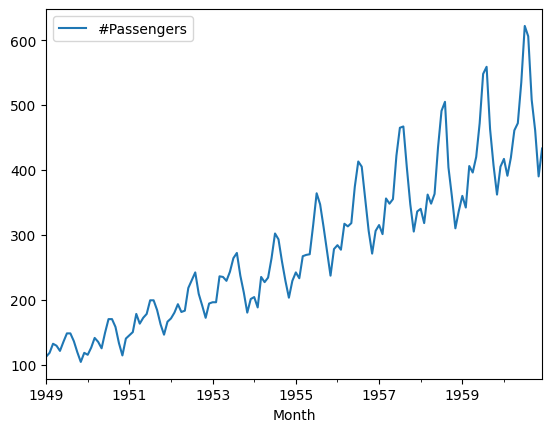

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_results=adfuller(df.iloc[:, 0]) # Access the 'Passengers' data using iloc

In [ ]:
def adfuller_test(Passengers):
  result=adfuller(Passengers)
  labels = ["ADF Test Statistics","p-value","#lags Used","Number of observation Used"]
  for value,label in zip(result,labels):
    print(label+":"+str(value))
  if result[1] <=0.05:
     print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is statinary ")
  else:
    print("weak evidence against the null hypothesis,time series has a unit root,indicating it is non-statinary")


In [ ]:
adfuller_test(df.iloc[:, 0])

ADF Test Statistics:0.8273719403667971
p-value:0.9920653980124213
#lags Used:13
Number of observation Used:130
weak evidence against the null hypothesis,time series has a unit root,indicating it is non-statinary


In [ ]:
df["Passengers First Difference"]=df.iloc[:, 0]-df.iloc[:, 0].shift(1)
df.iloc[:, 0].shift(1)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0
...,...
1960-08-01,622.0
1960-09-01,606.0
1960-10-01,508.0


In [ ]:
df["Seasonal First Difference"]=df.iloc[:, 0]-df.iloc[:, 0].shift(30)
df.head(30)

,#Passengers,Passengers First Difference,Seasonal First Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


In [ ]:
adfuller_test(df["Passengers First Difference"].dropna())

ADF Test Statistics:-2.8241660001170543
p-value:0.05490387989209212
#lags Used:12
Number of observation Used:130
weak evidence against the null hypothesis,time series has a unit root,indicating it is non-statinary
